# **Gradient Descent**

## **Basic**

In [10]:
import torch
import torch.nn.functional as F

목표 텐서 생성

In [11]:
target = torch.FloatTensor([[.1,.2,.3],
                            [.4,.5,.6],
                            [.7,.8,.9]])

랜덤 값을 갖는 텐서 생성

In [12]:
x = torch.rand_like(target)
x.requires_grad = True #x에 대
한 미분을 추적

print(x)

tensor([[0.2829, 0.9466, 0.5937],
        [0.6624, 0.9006, 0.6616],
        [0.1761, 0.2541, 0.2936]], requires_grad=True)


두 텐서 사이의 손실값 계산

In [13]:
loss = F.mse_loss(x, target)

loss

tensor(0.2056, grad_fn=<MseLossBackward0>)

While 반복문을 사용하여 두 텐서 값이 차이가 threshold보다 작아질 때까지 미분 및 경사하강법 반복 수행

In [15]:
threshold = 1e-5
learning_rate = 1.0
iter_cnt = 0

while loss > threshold:
    iter_cnt += 1

    loss.backward() #손실을 x에 대해 편미분해 x.grad에 저장

    x = x - learning_rate * x.grad

    # autograd 그래프 초기화. 매 iterator마다 새 그래프로 갱신
    x.detach_()
    x.requires_grad_(True)

    loss = F.mse_loss(x, target) #손실 재계산

    print('%d-th Loss: %.4e' % (iter_cnt, loss))
    print(x)

1-th Loss: 7.5240e-02
tensor([[0.2107, 0.6516, 0.4777],
        [0.5587, 0.7423, 0.6372],
        [0.3831, 0.4698, 0.5331]], requires_grad=True)
2-th Loss: 4.5516e-02
tensor([[0.1861, 0.5513, 0.4382],
        [0.5235, 0.6885, 0.6290],
        [0.4535, 0.5431, 0.6147]], requires_grad=True)
3-th Loss: 2.7534e-02
tensor([[0.1670, 0.4732, 0.4075],
        [0.4960, 0.6466, 0.6225],
        [0.5083, 0.6002, 0.6781]], requires_grad=True)
4-th Loss: 1.6656e-02
tensor([[0.1521, 0.4125, 0.3836],
        [0.4747, 0.6140, 0.6175],
        [0.5509, 0.6446, 0.7274]], requires_grad=True)
5-th Loss: 1.0076e-02
tensor([[0.1405, 0.3653, 0.3650],
        [0.4581, 0.5887, 0.6136],
        [0.5840, 0.6791, 0.7657]], requires_grad=True)
6-th Loss: 6.0954e-03
tensor([[0.1315, 0.3285, 0.3506],
        [0.4452, 0.5690, 0.6106],
        [0.6098, 0.7060, 0.7956]], requires_grad=True)
7-th Loss: 3.6874e-03
tensor([[0.1245, 0.3000, 0.3393],
        [0.4351, 0.5536, 0.6082],
        [0.6298, 0.7269, 0.8188]], requi

C:\Users\user\AppData\Local\Temp\ipykernel_10376\3753912855.py:17: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\autograd\generated\python_variable_methods.cpp:836.)
  print('%d-th Loss: %.4e' % (iter_cnt, loss))


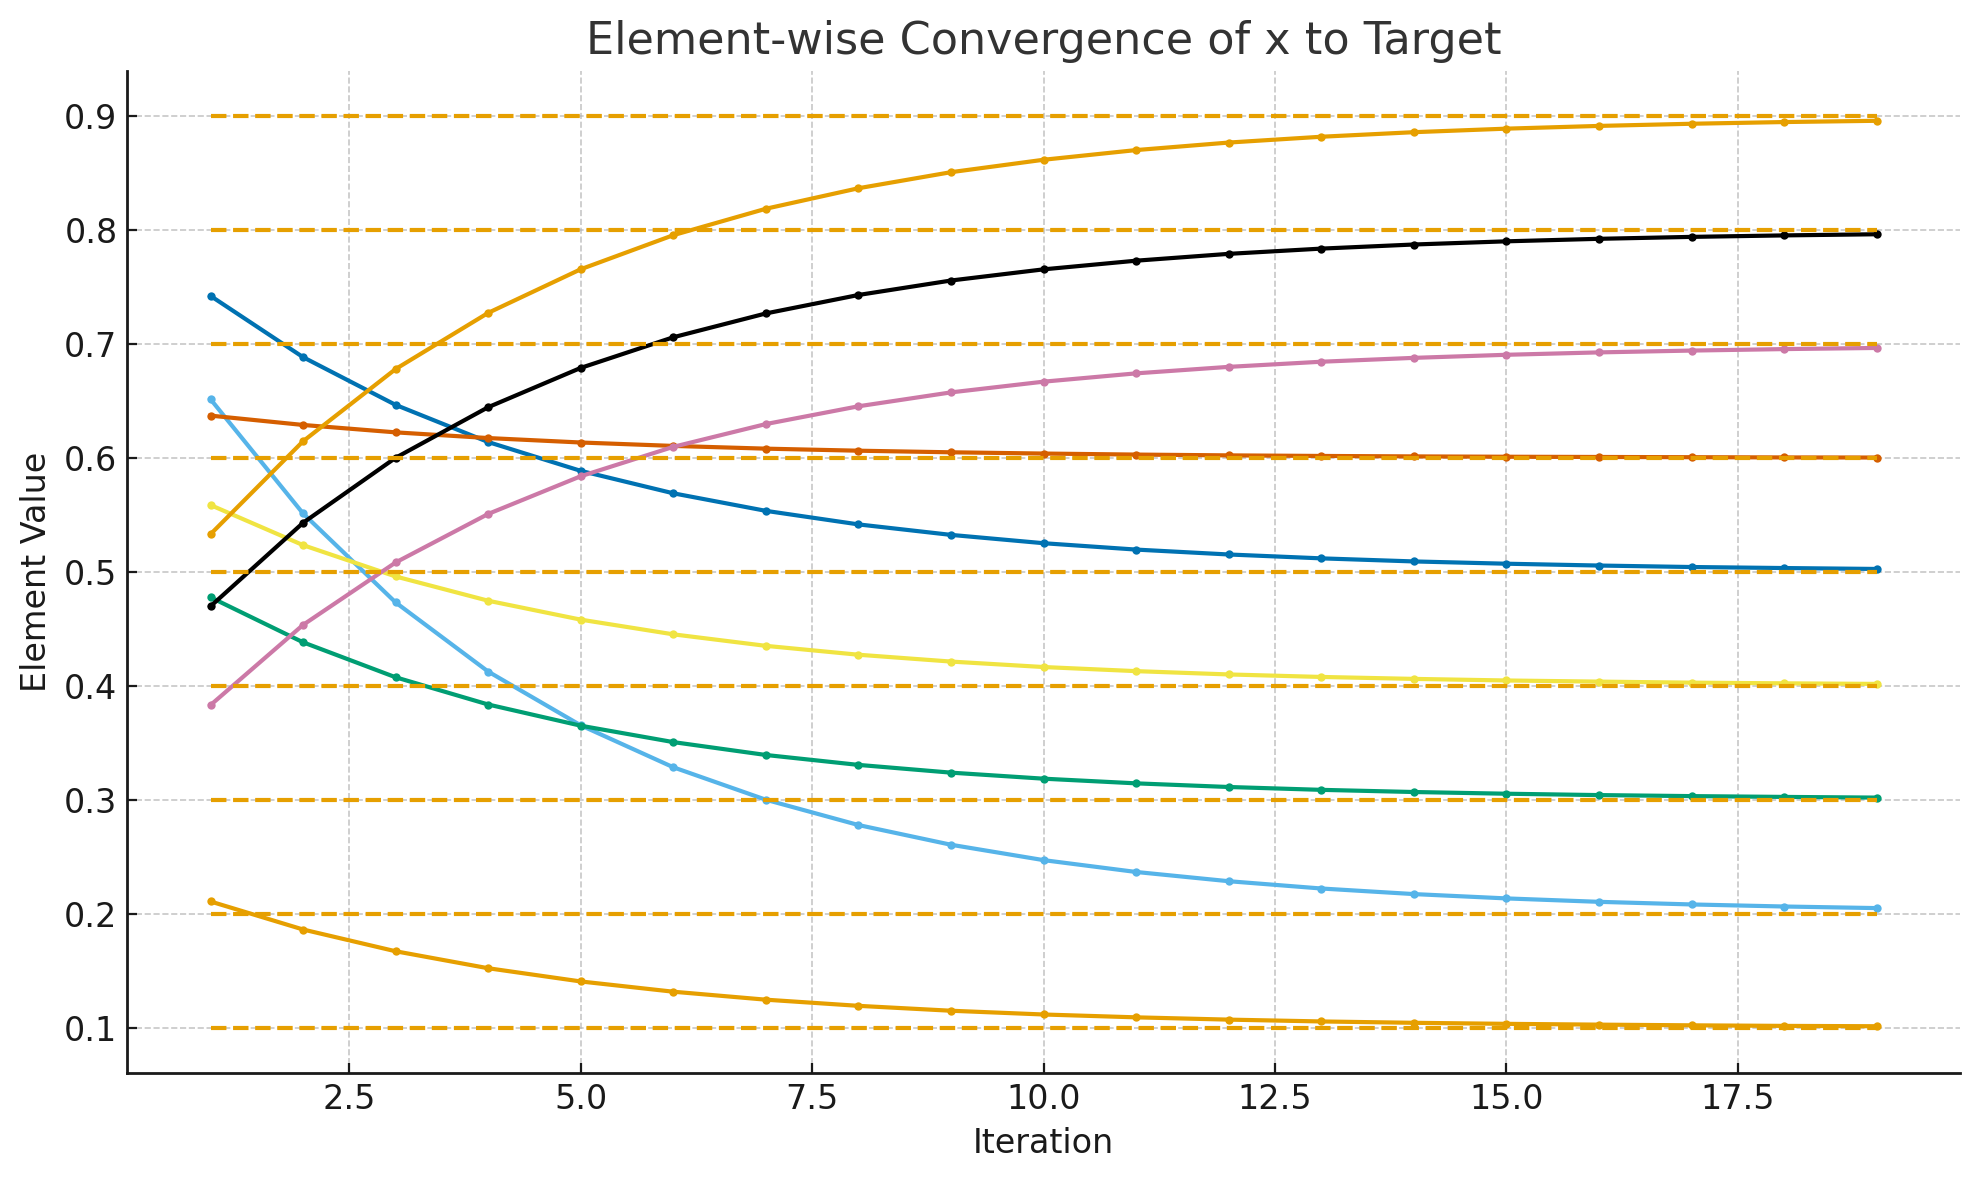

=> 매 iteration마다 x의 각 9개의 원소들이 target 값에 수렴

---

## **Pytorch Autograd**